# **Задание 1**

In [151]:
import numpy as np
import random

variant = 17

## Общие параметры


In [152]:
sales = []

for i in range(4):
    sales.append([random.randint(variant, variant+100) for j in range(100000)])

for j in range(4):    
    print(sales[j][:20]) # 1-ая строка => 'автомобиль HAVAL', 2-ая => 'обувь', 3-ья => 'одежда', 4-ая => 'телефоны'

[57, 17, 68, 40, 105, 59, 108, 25, 74, 92, 51, 108, 81, 39, 47, 100, 31, 54, 35, 35]
[44, 103, 29, 109, 34, 78, 68, 56, 86, 100, 56, 59, 94, 77, 39, 64, 82, 36, 87, 91]
[73, 85, 107, 36, 46, 51, 66, 86, 62, 109, 34, 23, 73, 76, 89, 52, 78, 57, 90, 23]
[38, 61, 90, 69, 90, 58, 95, 77, 27, 59, 99, 70, 37, 81, 70, 78, 39, 40, 63, 95]


## Решение через Python

In [153]:
products = ['автомобиль HAVAL', 'обувь', 'одежда', 'телефоны']
prices = [20000, 3000, 45600, 5000]

revenue_py = []

In [154]:
def revenue_from_sales_py(arr):
    revenue = []
    
    for i in range(4):
        number_sales_product = 0
        for j in range(100000):
            number_sales_product += arr[i][j]
        revenue.append(number_sales_product * prices[i])
        
    return revenue

In [155]:
%timeit revenue_py = revenue_from_sales_py(sales)
# время работы кода на python

21.4 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [156]:
revenue_py = revenue_from_sales_py(sales)
for i in range(4):
    print(f"{products[i]}: ", end="")
    print("{:,}".format(revenue_py[i]))  

автомобиль HAVAL: 133,732,860,000
обувь: 20,076,420,000
одежда: 305,363,637,600
телефоны: 33,429,175,000


## Решение через NumPy

In [157]:
products = np.array(['автомобиль HAVAL', 'обувь', 'одежда', 'телефоны'])
prices = np.array([20000, 3000, 45600, 5000])
sales = np.array(sales)

revenue_sales_np = []

In [158]:
def revenue_from_sales_np(arr):
    revenue = []
    
    for i in range(4):
        number_sales_product = np.sum(sales[i])
        revenue.append(number_sales_product * prices[i])
        
    return revenue

In [159]:
%timeit revenue_np = revenue_from_sales_np(sales)
# время работы кода на numpy

81.4 µs ± 913 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [160]:
revenue_np = revenue_from_sales_np(sales)
for i in range(4):
    print(f"{products[i]}: ", end="")
    print("{:,}".format(revenue_np[i]))  

автомобиль HAVAL: 133,732,860,000
обувь: 20,076,420,000
одежда: 305,363,637,600
телефоны: 33,429,175,000


## Решение через Numpy с использованием векторизации

In [161]:
products = np.array(['автомобиль HAVAL', 'обувь', 'одежда', 'телефоны'])
prices = np.array([20000, 3000, 45600, 5000])
sales = np.array(sales)

revenue_sales_np_vec = []

In [162]:
def revenue_from_sales_np_vec(arr):
    number_sales_product = np.sum(sales, axis = 1) * prices
    #revenue = number_sales_product * prices[i]
        
    return number_sales_product

In [163]:
%timeit revenue_np_vec = revenue_from_sales_np_vec(sales)
# время работы кода на numpy с использованием векторизации


69 µs ± 3.64 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [164]:
revenue_np_vec = revenue_from_sales_np_vec(sales)
for i in range(4):
    print(f"{products[i]}: ", end="")
    print("{:,}".format(revenue_np[i]))

автомобиль HAVAL: 133,732,860,000
обувь: 20,076,420,000
одежда: 305,363,637,600
телефоны: 33,429,175,000


## Сравнение


In [165]:
print("Python = ", end="")
%timeit revenue_py = revenue_from_sales_py(sales)
# время работы кода на python

print("NumPy = ", end="")
%timeit revenue_np = revenue_from_sales_np(sales)
# время работы кода на numpy

print("NumPy vec = ", end="")
%timeit revenue_np_vec = revenue_from_sales_np_vec(sales)
# время работы кода на numpy с использованием векторизации

Python = 101 ms ± 6.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NumPy = 84 µs ± 3.74 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
NumPy vec = 66.6 µs ± 941 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [166]:
x = np.arange(4)
new = np.vstack([x,revenue_py])
sorted_array = np.sort(revenue_py)

print("Вывод категорий товаров по возрастанию дохода: \n")
for ar in sorted_array:
    for i in range(4):
        if ar == new[1][i]:
            print(f"{products[i]}: ", end="")
            print("{:,}".format(new[1][i]))

Вывод категорий товаров по возрастанию дохода: 

обувь: 20,076,420,000
телефоны: 33,429,175,000
автомобиль HAVAL: 133,732,860,000
одежда: 305,363,637,600


# **Задание 2**

## Реализация heapsort

In [167]:
def heap_with_maxi_root(arr, i, max_index): # Пишем алгоритм по созданию двоичного дерева, в корне которого будет максимальный элемент
    
    node = i # Индекс текущего узелка
    l = 2 * i + 1 # Левый дочерний узел двоичного дерева у элемента с индексом i
    r = 2 * i + 2 # Правый дочерний узел
    
    
    # Посмотрим, существует ли левый дочерний узел у текущего элемента
    # и проверим, будет ли он больше по величене, чем текущий элемент
    if l < max_index and arr[node] < arr[l]:
        node = l # Сдвигаем наш указатель дальше
   

    # Аналогично с правым дочерним узлом
    if r < max_index and arr[node] < arr[r]:
        node = r # Сдвигаем наш указатель дальше
        
        
    # Если указатель не на текущем элементе, т.е. если среди дочерних элементов нашелся такой, который больше по значению, чем текущий, то свапаем их    
    if node != i: 
        arr[i], arr[node] = arr[node], arr[i]
        
        # Пока условие выполняется, т.е. данный кусочек дерева (который ниже i) неотсортирован, продолжаем его выстраивать под концепцию двоичного дерева с бОльшими родительскими узлами
        heap_with_maxi_root(arr, node, max_index)

        
        
def heap_sort(arr):
    
    max_index = len(arr)
 
    # Выстраиваем дерево с максимальной вершиной
    for i in range(max_index//2 - 1, -1, -1):
        heap_with_maxi_root(arr, i, max_index)
 
    # "Вырезаем" вершину отсортированного дерева и свапаем последний элемент списка(из тех, что еще неотсортированы) с вершиной
    for i in range(max_index - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i] 
        heap_with_maxi_root(arr, 0, i) # Заново сортируем после swap
        

In [168]:
array = np.random.randint(100, size = variant * 100).astype(int)
print(array)

[99 92 19 ... 78 57 67]


In [169]:
%%timeit
heap_sort(array)

12.6 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [170]:
# Отсортированный массив
print(f"length = {len(array)}")
print(array)


length = 1700
[ 0  0  0 ... 99 99 99]


## Реализация heapsort на Python

In [171]:
array_2 = [random.randint(0, variant+100) for i in range(variant*100)]
print(array_2[:20])

[24, 1, 97, 7, 75, 48, 54, 68, 46, 5, 26, 5, 20, 105, 45, 58, 30, 45, 92, 84]


In [172]:
def max_heapify(arr,n,i):
    l = 2 * i + 1
    r = 2 * i + 2
 
    if l < n and arr[l] > arr[i]:
        largest = l
    else:
        largest = i
 
    if r < n and arr[r] > arr[largest]:
        largest = r
 
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        max_heapify(arr, n, largest)


def build_heap(arr):
    n = len(arr)
 
    for i in range(n, -1,-1):
        max_heapify(arr, n, i)
 
    for i in range(n-1,0,-1):
        arr[0] ,arr[i] = arr[i], arr[0]
        max_heapify(arr, i, 0)

In [173]:
%%timeit
build_heap(array_2)

3.39 ms ± 55.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [174]:
# Отсортированный массив
print(f"length = {len(array_2)}")
print(array_2[:100])

length = 1700
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


## np.sort()

In [175]:
array_3 = np.random.randint(100, size = variant * 100).astype(int)
print(array_3)

[ 0 35  3 ... 73 27 57]


In [176]:
%%timeit
np.sort(array_3)

38 µs ± 960 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [177]:
# Отсортированный массив
print(f"length = {len(array_3)}")
print(np.sort(array_3))

length = 1700
[ 0  0  0 ... 99 99 99]


## Сравнение времени

In [178]:
print("My_heapsort = ", end="") 
%timeit heap_sort(array)

print("Python = ", end="") 
%timeit build_heap(array_2)

print("Np.sort() = ", end="") 
%timeit np.sort(array_3)

My_heapsort = 12.3 ms ± 224 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Python = 3.42 ms ± 66.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Np.sort() = 37.9 µs ± 678 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


# **Задание 3**

In [179]:
data = np.genfromtxt('/Users/dmitry/Downloads/drinks.csv', delimiter=',', skip_header = 1, 
                     dtype={ 
                            "names": ["country", "beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"],
                            "formats": ["U20", "i4", "i4", "i4", "f8"]
                            }
                    )  

In [180]:
print(data[:20])

[('Afghanistan',   0,   0,   0,  0. ) ('Albania',  89, 132,  54,  4.9)
 ('Algeria',  25,   0,  14,  0.7) ('Andorra', 245, 138, 312, 12.4)
 ('Angola', 217,  57,  45,  5.9)
 ('Antigua & Barbuda', 102, 128,  45,  4.9)
 ('Argentina', 193,  25, 221,  8.3) ('Armenia',  21, 179,  11,  3.8)
 ('Australia', 261,  72, 212, 10.4) ('Austria', 279,  75, 191,  9.7)
 ('Azerbaijan',  21,  46,   5,  1.3) ('Bahamas', 122, 176,  51,  6.3)
 ('Bahrain',  42,  63,   7,  2. ) ('Bangladesh',   0,   0,   0,  0. )
 ('Barbados', 143, 173,  36,  6.3) ('Belarus', 142, 373,  42, 14.4)
 ('Belgium', 295,  84, 212, 10.5) ('Belize', 263, 114,   8,  6.8)
 ('Benin',  34,   4,  13,  1.1) ('Bhutan',  23,   0,   0,  0.4)]


In [181]:
beer_max = data["country"][np.argmax(data['beer_servings'])]
print(f"Первое место в списке потребителей пива: {beer_max} -> {np.max(data['beer_servings'])}")

spirit_max = data["country"][np.argmax(data['spirit_servings'])]
print(f"Первое место в списке потребителей крепких спиртных напитков: {spirit_max} -> {np.max(data['spirit_servings'])}")

wine_max = data["country"][np.argmax(data['wine_servings'])]
print(f"Первое место в списке потребителей вина: {wine_max} -> {np.max(data['wine_servings'])}")

alcohol_max = data["country"][np.argmax(data['total_litres_of_pure_alcohol'])]
print(f"Первое место в списке потребителей алкоголя: {alcohol_max} -> {np.max(data['total_litres_of_pure_alcohol'])}")


Первое место в списке потребителей пива: Namibia -> 376
Первое место в списке потребителей крепких спиртных напитков: Grenada -> 438
Первое место в списке потребителей вина: France -> 370
Первое место в списке потребителей алкоголя: Belarus -> 14.4


# **Задание 4**

In [182]:
david_tarino = np.genfromtxt('/Users/dmitry/Downloads/tarantino.csv', delimiter=',', skip_header = 1, 
                     dtype={ 
                            "names": ["movie", "type", "word", "minutes_in"],
                            "formats": ["U20", "U20", "U20", "f8"]
                            }
                    ) 

In [183]:
print(david_tarino[:20])

[('Reservoir Dogs', 'word', 'dick', 0.4 )
 ('Reservoir Dogs', 'word', 'dicks', 0.43)
 ('Reservoir Dogs', 'word', 'fucked', 0.55)
 ('Reservoir Dogs', 'word', 'fucking', 0.61)
 ('Reservoir Dogs', 'word', 'bullshit', 0.61)
 ('Reservoir Dogs', 'word', 'fuck', 0.66)
 ('Reservoir Dogs', 'word', 'shit', 0.9 )
 ('Reservoir Dogs', 'word', 'fuck', 1.43)
 ('Reservoir Dogs', 'word', 'dicks', 1.56)
 ('Reservoir Dogs', 'word', 'fuck', 1.66)
 ('Reservoir Dogs', 'word', 'dick', 1.75)
 ('Reservoir Dogs', 'word', 'dick', 1.75)
 ('Reservoir Dogs', 'word', 'dick', 1.75)
 ('Reservoir Dogs', 'word', 'dick', 1.75)
 ('Reservoir Dogs', 'word', 'dick', 1.75)
 ('Reservoir Dogs', 'word', 'dick', 1.75)
 ('Reservoir Dogs', 'word', 'dick', 1.75)
 ('Reservoir Dogs', 'word', 'dicks', 1.75)
 ('Reservoir Dogs', 'word', 'motherfucker', 1.83)
 ('Reservoir Dogs', 'word', 'dick', 1.96)]


## Число проклятий, летальных исходов и их отношение по фильмам



In [184]:
number_of_curses = np.count_nonzero (david_tarino["type"] == "word")
print(f"Количество проклятий по всем фильмам: {number_of_curses}")

number_of_deaths = np.count_nonzero (david_tarino["type"] == "death")
print(f"Количество летальных исходов по всем фильмам: {number_of_deaths}")

Количество проклятий по всем фильмам: 1704
Количество летальных исходов по всем фильмам: 190


In [185]:
movies = np.unique(david_tarino["movie"])
print(movies)

['Django Unchained' 'Inglorious Basterds' 'Jackie Brown'
 'Kill Bill: Vol. 1' 'Kill Bill: Vol. 2' 'Pulp Fiction' 'Reservoir Dogs']


In [186]:
for i in range(len(movies)):
    curses = np.sum((david_tarino["movie"] == movies[i])*(david_tarino["type"] == "word"))
    deaths = np.sum((david_tarino["movie"] == movies[i])*(david_tarino["type"] == "death"))
    ratio_of_quantities = curses / deaths
    print(f"Число смертей в фильме {movies[i]}: {deaths}\nЧисло проклятий в фильме {movies[i]}: {curses}\nИх отношение: {round(ratio_of_quantities,3)}\n")

Число смертей в фильме Django Unchained: 47
Число проклятий в фильме Django Unchained: 262
Их отношение: 5.574

Число смертей в фильме Inglorious Basterds: 48
Число проклятий в фильме Inglorious Basterds: 58
Их отношение: 1.208

Число смертей в фильме Jackie Brown: 4
Число проклятий в фильме Jackie Brown: 368
Их отношение: 92.0

Число смертей в фильме Kill Bill: Vol. 1: 63
Число проклятий в фильме Kill Bill: Vol. 1: 57
Их отношение: 0.905

Число смертей в фильме Kill Bill: Vol. 2: 11
Число проклятий в фильме Kill Bill: Vol. 2: 69
Их отношение: 6.273

Число смертей в фильме Pulp Fiction: 7
Число проклятий в фильме Pulp Fiction: 469
Их отношение: 67.0

Число смертей в фильме Reservoir Dogs: 10
Число проклятий в фильме Reservoir Dogs: 421
Их отношение: 42.1



## Частота употребления конкретных прокрятий

In [187]:
arr_curses = np.unique(david_tarino["word"])
arr_curses = np.delete(arr_curses, 0, 0)

print(f"Список всех проклятий: {arr_curses}")

Список всех проклятий: ['ass' 'asses' 'asshead' 'asshole' 'assholes' 'bastard' 'bastards' 'bitch'
 'bitches' 'bullshit' 'chickenshit' 'cockblockery' 'cocksucker' 'cunt'
 'cunts' 'damn' 'damned' 'dick' 'dickless' 'dicks' 'dumbass' 'faggot'
 'fuck' 'fucked' 'fucker' 'fuckers' 'fuckface' 'fuckhead' 'fucking'
 'fucks' 'fuckup' 'goddamn' 'goddamned' 'gook' 'gooks' 'hell' 'horeshit'
 'horseshit' 'jackass' 'jap' 'japs' 'jew (verb)' 'merde' 'motherfucker'
 'motherfuckers' 'motherfucking' 'n-word ' 'negro ' 'pussy' 'shit'
 'shithead' 'shitless' 'shitload' 'shittiest' 'shitting' 'shitty' 'slope'
 'slut' 'squaw' 'wetback']


In [188]:
for word in arr_curses:
    number_of_curse = np.sum(david_tarino["word"]==word)
    print(f"{word} = {number_of_curse}")

ass = 140
asses = 4
asshead = 1
asshole = 10
assholes = 5
bastard = 10
bastards = 1
bitch = 64
bitches = 9
bullshit = 15
chickenshit = 1
cockblockery = 1
cocksucker = 2
cunt = 2
cunts = 1
damn = 37
damned = 3
dick = 14
dickless = 1
dicks = 5
dumbass = 1
faggot = 1
fuck = 213
fucked = 25
fucker = 8
fuckers = 1
fuckface = 1
fuckhead = 1
fucking = 407
fucks = 3
fuckup = 1
goddamn = 113
goddamned = 1
gook = 1
gooks = 2
hell = 45
horeshit = 1
horseshit = 2
jackass = 1
jap = 1
japs = 2
jew (verb) = 1
merde = 1
motherfucker = 70
motherfuckers = 15
motherfucking = 27
n-word  = 179
negro  = 5
pussy = 11
shit = 221
shithead = 3
shitless = 1
shitload = 2
shittiest = 1
shitting = 1
shitty = 4
slope = 1
slut = 1
squaw = 1
wetback = 2


## Распределение времени между проклятиями

Django Unchained: [0.4  0.43 0.55 0.61 0.61 0.66 0.9  1.43 1.56 1.66 1.75 1.75 1.75 1.75
 1.75 1.75 1.75 1.75 1.83 1.96] ...

Inglorious Basterds: [0.4  0.43 0.55 0.61 0.61 0.66 0.9  1.43 1.56 1.66 1.75 1.75 1.75 1.75
 1.75 1.75 1.75 1.75 1.83 1.96] ...

Jackie Brown: [0.4  0.43 0.55 0.61 0.61 0.66 0.9  1.43 1.56 1.66 1.75 1.75 1.75 1.75
 1.75 1.75 1.75 1.75 1.83 1.96] ...

Kill Bill: Vol. 1: [0.4  0.43 0.55 0.61 0.61 0.66 0.9  1.43 1.56 1.66 1.75 1.75 1.75 1.75
 1.75 1.75 1.75 1.75 1.83 1.96] ...

Kill Bill: Vol. 2: [0.4  0.43 0.55 0.61 0.61 0.66 0.9  1.43 1.56 1.66 1.75 1.75 1.75 1.75
 1.75 1.75 1.75 1.75 1.83 1.96] ...

Pulp Fiction: [0.4  0.43 0.55 0.61 0.61 0.66 0.9  1.43 1.56 1.66 1.75 1.75 1.75 1.75
 1.75 1.75 1.75 1.75 1.83 1.96] ...

Reservoir Dogs: [0.4  0.43 0.55 0.61 0.61 0.66 0.9  1.43 1.56 1.66 1.75 1.75 1.75 1.75
 1.75 1.75 1.75 1.75 1.83 1.96] ...



(array([  2.,   1.,   1.,   0.,   2., 866., 430., 170.,  99.,  57.,  42.,
         33.,  16.,  13.,  16.,  16.,  10.,   9.,   8.,   8.,   5.,  15.,
          6.,   6.,   5.,   7.,   5.,   1.,   5.,   5.,   0.,   2.,   2.,
          1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.97  , -0.7931, -0.6162, -0.4393, -0.2624, -0.0855,  0.0914,
         0.2683,  0.4452,  0.6221,  0.799 ,  0.9759,  1.1528,  1.3297,
         1.5066,  1.6835,  1.8604,  2.0373,  2.2142,  2.3911,  2.568 ,
         2.7449,  2.9218,  3.0987,  3.2756,  3.4525,  3.6294,  3.8063,
         3.9832,  4.1601,  4.337 ,

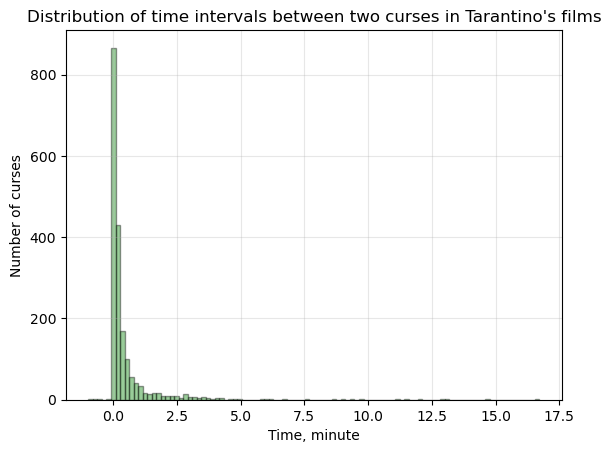

In [189]:
import matplotlib.pyplot as plt

times = []
for movie in movies:
    idx = np.where(david_tarino["movie"] == movie)
    arr_time = david_tarino["minutes_in"][idx[0][0]:idx[0][-1]]
    np.sort(arr_time)
    print(f"{movie}: {arr_new[:20]} ...\n")
    
    diff = np.diff(arr_time)
    times = np.concatenate([times, diff])

plt.xlabel("Time, minute")
plt.ylabel("Number of curses")
plt.title("Distribution of time intervals between two curses in Tarantino's films")
plt.grid(alpha=0.3)
plt.hist(times, bins = 100, color = "green", edgecolor='black', alpha = 0.4)

